<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [2]:
# import required packages

import csv
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Code cell

file = open('arac.csv')
type(file)
csvreader = csv.reader(file)
header = []
header = next(csvreader)
BASE_YEAR = 1965
data = [[], [], []] # [years, cars, buses]
for row in csvreader:
    splitted = row[0].split(';')
    data[0].append((int(splitted[0]) - BASE_YEAR) / 10)
    data[1].append(int(splitted[2]))
    data[2].append(int(splitted[4]))
num_data = len(data[0])

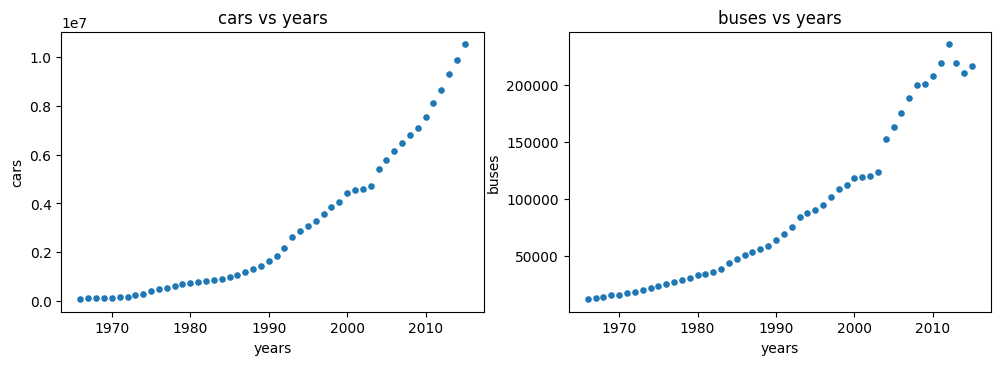

In [4]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('cars vs years')
plt.xlabel('years')
plt.ylabel('cars')
plt.scatter([10 * x + BASE_YEAR for x in data[0]],data[1] , s = 14)
plt.subplot(222)
plt.title('buses vs years')
plt.xlabel('years')
plt.ylabel('buses')
plt.scatter([10 * x + BASE_YEAR for x in data[0]],data[2], s = 14)
plt.show()

In [5]:
def list_square(k, car_bus = 1): # 1 for cars and 2 for buses
    A = []
    b = []
    for i in range(num_data):
        x = data[0][i]
        y = data[car_bus][i]
        row = []
        for p in range(k + 1):
            row.append(x ** p)
        A.append(row)
        b.append(y)
    X = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)) , np.transpose(A)) , b)
    return np.flip(X)

In [6]:
prediction = []
def plot_least_square(k):
    title = ['cars' , 'buses']
    plt.figure(figsize=(13,8))
    plt.suptitle('K = {}'.format(k))
    for sub in range(2):
        plt.subplot(221 + sub)
        curve = list_square(k, sub + 1)
        X = np.linspace(0.1,5.5,541)
        Y = [np.polyval(curve, i) for i in X]
        prediction.append([int(Y[500 + 10 * i]) for i in range(5)])
        plt.scatter([10 * x + BASE_YEAR for x in data[0]],data[sub + 1] , s = 14)
        plt.plot([10 * x + BASE_YEAR for x in X],Y, c = 'r')
        plt.title('{} vs years'.format(title[sub]))
        plt.ylabel(title[sub])
        plt.legend([title[sub],'least square'])
    plt.show()

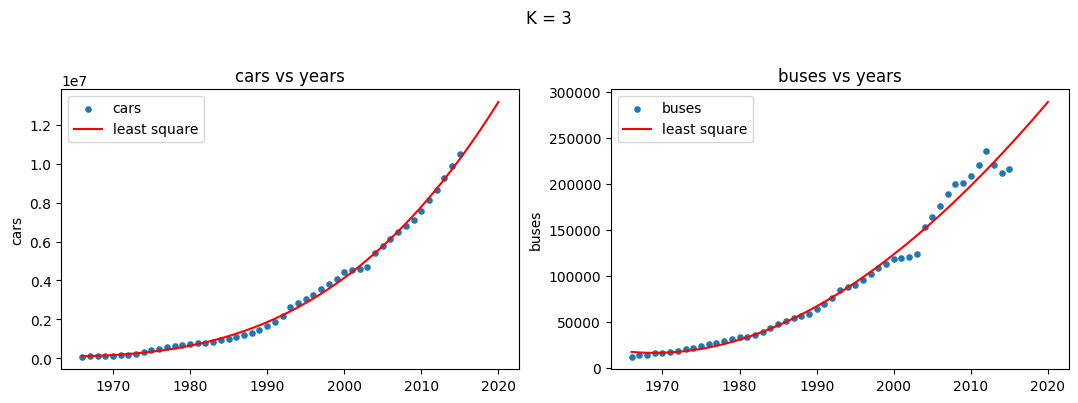

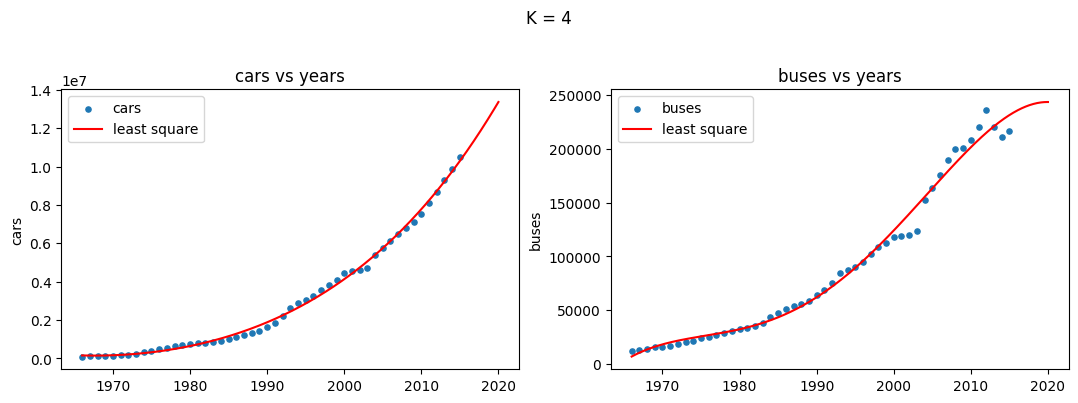

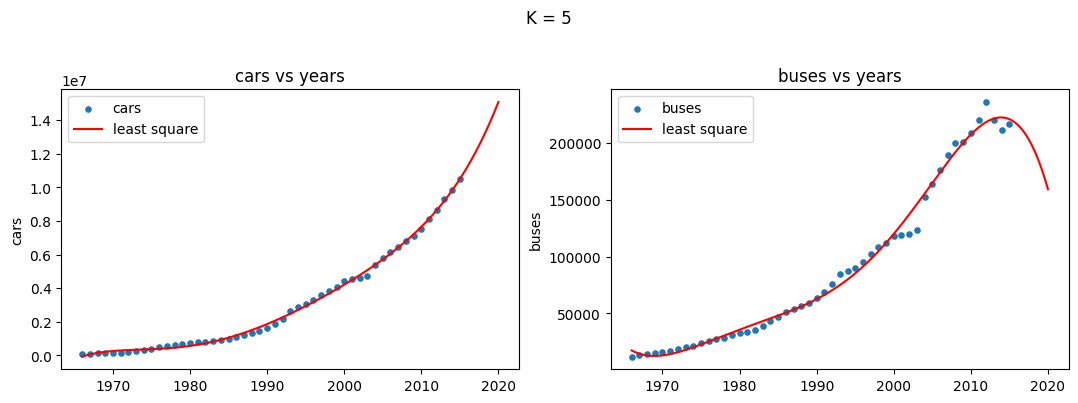

-------------------------------------------------------------------------------------------------------
|        |                      cars                    |                     buses                   |
-------------------------------------------------------------------------------------------------------
|  year  |   k = 3           k = 4           k = 5      |    k = 3           k = 4           k = 5    |
-------------------------------------------------------------------------------------------------------
|  2016  |  10791127        10855766        11246441    |    250684          235522          216376   |
-------------------------------------------------------------------------------------------------------
|  2017  |  11356456        11446444        12066928    |    260030          238921          208513   |
-------------------------------------------------------------------------------------------------------
|  2018  |  11941292        12061016        12973180    |    269

In [15]:
k_list = [3,4,5]
for k in k_list:
    plot_least_square(k)

line = '-' * 103
print(line)
print('{:<8} {:<22} {:<23} {:<21} {:<23} {}'.format('|','|','cars','|','buses','|'))
print(line)
print('{:<2} {:<5} {:<3} {:<15} {:<15} {:<10} {:<4} {:<15} {:<15} {:<8} |'.format('|','year','|',
'k = 3','k = 4','k = 5','|','k = 3','k = 4','k = 5'))
print(line)
for i in range(5):
    print('{:<2} {:<5} {:<2} {:<15} {:<15} {:<11} {:<4} {:<15} {:<15} {:<8} |'.format('|',2016 + i,
    '|',prediction[0][i],prediction[2][i],prediction[4][i],'|',prediction[1][i],prediction[3][i],prediction[5][i]))
    print(line)


## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [20]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import random

In [16]:
def load_data(file_name):
    file = open(file_name)
    type(file)
    csvreader = csv.reader(file)
    X = []
    for row in csvreader:
        X.append([float(row[0]),float(row[1])])
    return X

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [17]:
def distance(point1,point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def kmeans(X, K):
    
    M = random.sample(X,K) 
    error = [np.inf,0] 
    
    while True: 
        U = [[] for i in range(K)] 
        
        
        for point in X:
            dist = [distance(point, center) for center in M] 
            point_assigned_center = dist.index(min(dist))
            U[point_assigned_center].append(point) 
        
        error[1], error[0] = error[0], 0 
        for e in range(K): 
            
            error[0] += sum([distance(p,M[e]) for p in U[e]]) 
            
        if error[1] - error[0] <= 0.000001 : 
            break
        

        for index,centers in enumerate(U):
            M[index][0] = sum([center[0] for center in centers]) / len(centers) 
            M[index][1] = sum([center[1] for center in centers]) / len(centers)
            
    return M, U,error[0]

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [18]:
def plot_clusters(X, M, U):
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.scatter([point[0] for point in X],[point[1] for point in X], s = 10)
    plt.subplot(222)
    for cluster in U:
        plt.scatter([point[0] for point in cluster],[point[1] for point in cluster], s = 10)
    plt.scatter([center[0] for center in M],[center[1] for center in M])
    plt.show()

**<font color="red"> Don't edit the code in the following cell!</font>**

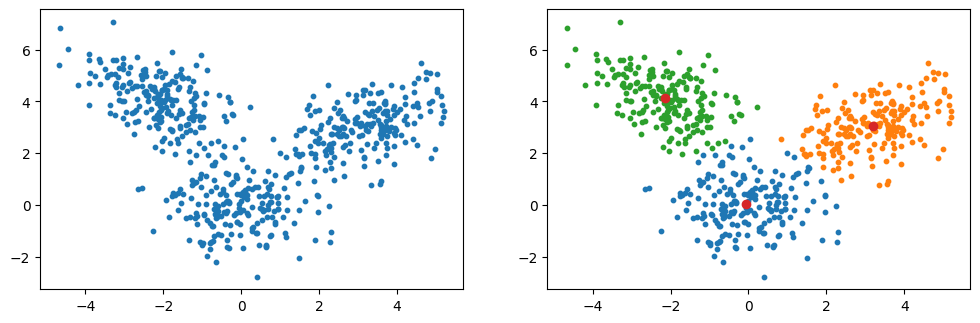

In [21]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U,err = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

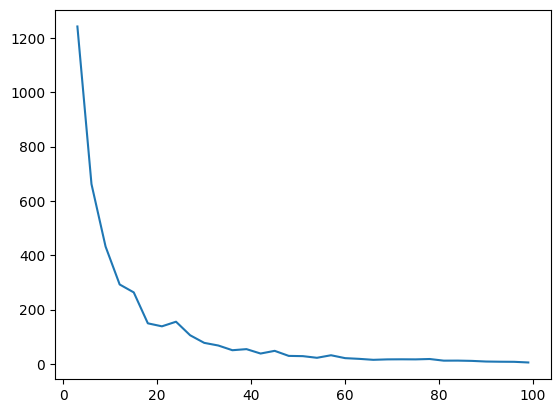

In [25]:
def elbow_method(X, K_list):
    error_list = []
    for k in K_list:
        M,U,err = kmeans(X,k)
        error_list.append(err)
    plt.figure()
    plt.plot(K_list,error_list)
    plt.show()

K_list = range(3,100,3)
elbow_method(X,K_list)

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import csv
import numpy as np

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [4]:
file = open('sentiment.csv')
type(file)
csvreader = csv.reader(file)
header = next(csvreader)
data = []
for row in csvreader:
    data.append([int(row[0]), int(row[1]), row[2], int(row[3]) ])

In [67]:
# TODO: First 25 rows of the dataset
for row in data[:25]:
    print(row)

[1, 1, 'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .', 1]
[2, 1, 'A series of escapades demonstrating the adage that what is good for the goose', 2]
[3, 1, 'A series', 2]
[4, 1, 'A', 2]
[5, 1, 'series', 2]
[6, 1, 'of escapades demonstrating the adage that what is good for the goose', 2]
[7, 1, 'of', 2]
[8, 1, 'escapades demonstrating the adage that what is good for the goose', 2]
[9, 1, 'escapades', 2]
[10, 1, 'demonstrating the adage that what is good for the goose', 2]
[11, 1, 'demonstrating the adage', 2]
[12, 1, 'demonstrating', 2]
[13, 1, 'the adage', 2]
[14, 1, 'the', 2]
[15, 1, 'adage', 2]
[16, 1, 'that what is good for the goose', 2]
[17, 1, 'that', 2]
[18, 1, 'what is good for the goose', 2]
[19, 1, 'what', 2]
[20, 1, 'is good for the goose', 2]
[21, 1, 'is', 2]
[22, 1, 'good for the goose', 3]
[23, 1, 'good', 3]
[24, 1, 'for the goose

In [68]:
# TODO: Last 10 rows of the dataset
for row in data[-10:]:
    print(row)

[9991, 419, 'this a comedy or serious drama', 2]
[9992, 419, 'a comedy or serious drama', 2]
[9993, 419, 'a comedy or', 2]
[9994, 419, 'a comedy', 2]
[9995, 419, 'serious drama', 2]
[9996, 420, 'plays like some corny television production from a bygone era', 1]
[9997, 420, 'plays like some corny television', 1]
[9998, 420, 'like some corny television', 2]
[9999, 420, 'some corny television', 1]
[10000, 420, 'corny television', 1]


In [69]:
# TODO: information of columns 
print('data number = ',len(data))
print('columns number = ',len(data[0]))
print('{:<3} {:15} {}'.format('n','name','type'))
for index,column in enumerate(header):
    print('{:<3} {:15} {}'.format(index,column,type(data[0][index])))

data number =  10000
columns number =  4
n   name            type
0   PhraseId        <class 'int'>
1   SentenceId      <class 'int'>
2   Phrase          <class 'str'>
3   Sentiment       <class 'int'>


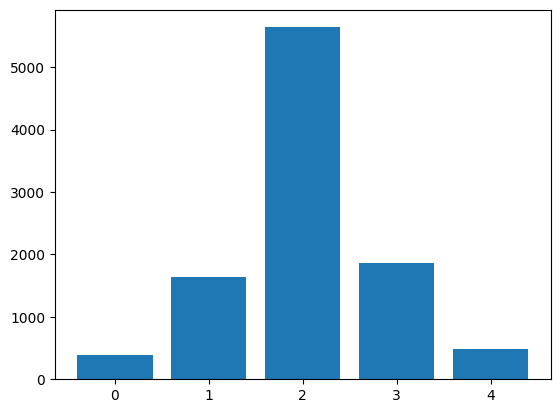

In [70]:
# TODO: histogram of sentiment scores
sentiment = [row[3] for row in data]
repeated_sentiment = [sentiment.count(i) for i in range(5)]
plt.bar(range(5),repeated_sentiment)
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [5]:
def preprocess_text(text):
    
    # TODO:
    text = re.sub(r'[^\w\s]','',text).casefold()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_tokens = [w for w in word_tokens if w not in stop_words]   
    text = ' '.join(filtered_tokens)
    
    return text

In [6]:
# TODO: Apply the preprocessing function to the text column
print('before example text : \n',data[0][2])
for sentence in data:
    sentence[2] = preprocess_text(sentence[2])
print('after example text : \n',data[0][2])

before example text : 
 A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
after example text : 
 series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story


### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

#### A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

##### 1  A vocabulary of known words.</br>
##### 2  A measure of the presence of known words.</br>

### step to use bag of words :
##### 1 collect data (documents)
##### 2 design the vocabulary : make list of all unique words (ignoring case and punctuation)
##### 3 create document vectors : next step is to score the words in each documents. The simplest scoring method is to count number of repetition words of vocabulary list in each documents

In [7]:
# TODO: Extract features from the preprocessed text data
document = [sentence[2] for sentence in data]
y = [sentence[3] for sentence in data]
vectorizer = CountVectorizer()
vectorizer.fit(document)
vector = vectorizer.transform(document)

### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [36]:
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size = 0.2)

# TODO: Train a linear regression model
regr = LinearRegression()
 
regr.fit(X_train, y_train)

# TODO: Make predictions on the testing set
y_pred = regr.predict(X_test)

# TODO: Evaluate the model using mean squared error
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print('mse on test data = ',mse)

mse on test data =  0.3786209395591125


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

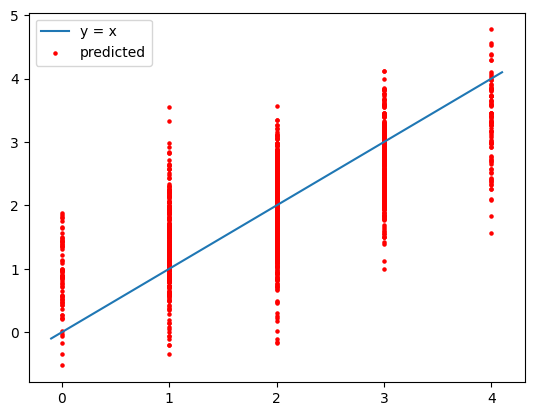

In [37]:
x_var = np.linspace(-0.1,4.1,100)
y_var = x_var
plt.plot(x_var,y_var,label = 'y = x')
plt.scatter(y_test, y_pred, s = 5 ,color ='r', label = 'predicted' ) 
plt.legend()
plt.show()

## <font color="red"> Discuss the resulted figure </font>

we plot true y and predicted y in figure. the X axis is true value and Y axis is predicted. for example for true value 0 the linear regression predict the values between -0.5 and 2. in fact we expect that the points on figure to be close to y = x line. because the feature extraction was very simple and also linear regression cannot fit proper the prediction is scatterd around y = x line. 

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [49]:
all_words = []
for sentence in document:
    for word in sentence.split(' '):
        if word not in all_words and word != '':
            all_words.append(word)
            
extraction_features = []
for sentence in document:
    row = []
    for word in all_words:
        row.append(1) if word in sentence else row.append(0)
    extraction_features.append(row)

print('number of words in vocabulary = ',len(all_words))
print('some words in vocabulary list' , all_words[:50])
print('dimension of extraction features : ' , len(extraction_features), '×' , len(extraction_features[0]))
print('extraction features example : ')
for row in extraction_features[:10]:
    print(row[:50])

number of words in vocabulary =  2451
some words in vocabulary list ['series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'also', 'gander', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story', 'quiet', 'introspective', 'entertaining', 'independent', 'worth', 'seeking', 'even', 'fans', 'ismail', 'merchant', 'work', 'suspect', 'would', 'hard', 'time', 'sitting', 'one', 'positively', 'thrilling', 'combination', 'ethnography', 'intrigue', 'betrayal', 'deceit', 'murder', 'shakespearean', 'tragedy', 'juicy', 'soap', 'opera', 'aggressive', 'selfglorification', 'manipulative', 'whitewash', 'comedydrama', 'nearly']
dimension of extraction features :  10000 × 2451
extraction features example : 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 